# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Yohanes]
- **Email:** [m180d4ky2893@bangkit.academy]
- **ID Dicoding:** [yohanes_m180d4ky2893_0eYd]

## Menentukan Pertanyaan Bisnis

- How is the performance of bike sharing on weekdays each month?
- How is the distribution of 'workingday' values in the bike sharing dataset based on month?
- How is the total score based on season in the dataset, for holiday, weekday, and workingday?

## Import Semua Packages/Library yang Digunakan

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

Below is the code for reading the csv file that will be used

In [28]:
df = pd.read_csv('C:\kuliah\Semester 6\Submission\day.csv')

### Assessing Data

prints the first 5 rows of the DataFrame df to the console or output. It provides a quick overview of the data and its structure

In [29]:
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Cleaning Data
Below it can be seen that no missing values are found, so we don't need to handle them



In [30]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Perform data cleaning and then display the cleaned data

In [31]:
df_cleaned = df.dropna()
cleaned_file_path = r'C:\kuliah\Semester 6\Submission\cleaned_day.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(df_cleaned.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


## Exploratory Data Analysis (EDA)

### Explore ...

This code calculates the total number of weekdays for each month in the DataFrame and stores the result in a new DataFrame called total_weekday

In [32]:
total_weekday = df.groupby('mnth')['weekday'].sum().reset_index()

this code calculates the total counts of holidays, weekdays, and working days for each season in the DataFrame and stores the result in a new DataFrame called total_season

In [33]:
total_season = df.groupby('season')[['holiday', 'weekday', 'workingday']].sum().reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
This code segment creates a visual representation of the total bike sharing on weekdays for each month using a pie chart. Each slice of the pie represents a month, and the size of each slice indicates the proportion of bike sharing for weekdays in that month

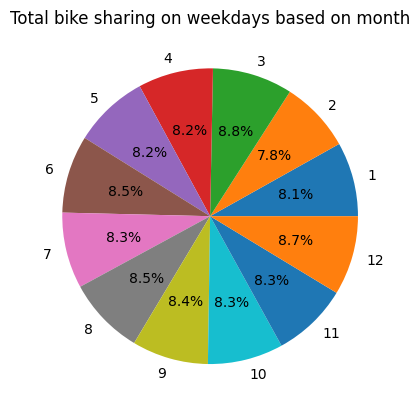

In [34]:
plt.figure()
plt.pie(total_weekday['weekday'], labels=total_weekday['mnth'], autopct='%1.1f%%')
plt.title('Total bike sharing on weekdays based on month')
plt.show()

### Pertanyaan 2:
This code segment creates a visual representation of the total bike sharing values on working days for each month using a bar plot. Each bar represents a month, and the height of each bar indicates the total bike sharing values on working days for that month.

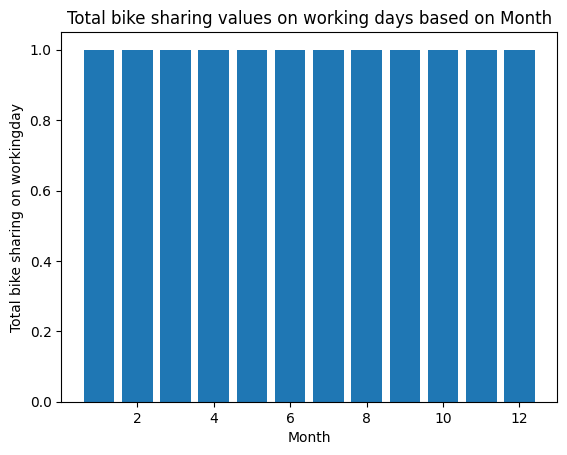

In [35]:
plt.bar(df['mnth'],df['workingday'])
plt.title('Total bike sharing values ​​on working days based on Month')
plt.xlabel('Month')
plt.ylabel('Total bike sharing on workingday')
plt.show()

### Pertanyaan 3:
 This code segment creates a visual representation of the total values of different attributes for each season using a Area chart. Each segment in the Area Chart represents a different attribute, and the height of each segment indicates the total value of that attribute for each season.

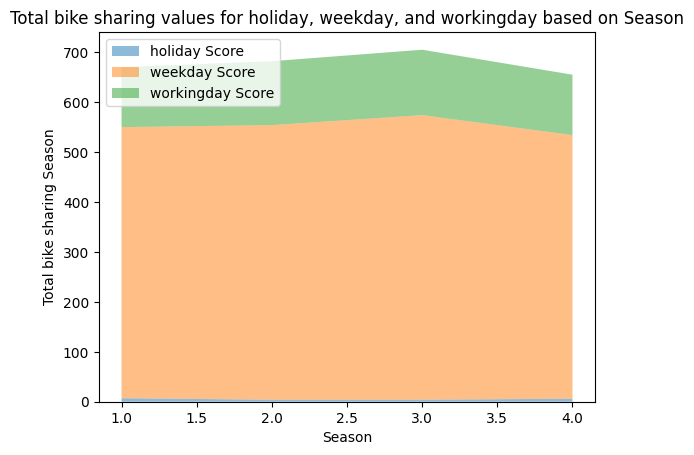

In [38]:
plt.figure()
plt.stackplot(total_season['season'], total_season['holiday'], total_season['weekday'], total_season['workingday'],
              labels=['holiday Score', 'weekday Score', 'workingday Score'], alpha=0.5)
plt.title('Total bike sharing values ​​for holiday, weekday, and workingday based on Season')
plt.xlabel('Season')
plt.ylabel('Total bike sharing Season')
plt.legend(loc='upper left')
plt.show()

This code segment performs KMeans clustering on the bike sharing data and visualizes the clustering results by plotting a scatter plot of 'weekday' vs 'workingday' for each cluster.

Clustering Results:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  r

C:\Users\Yohanes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


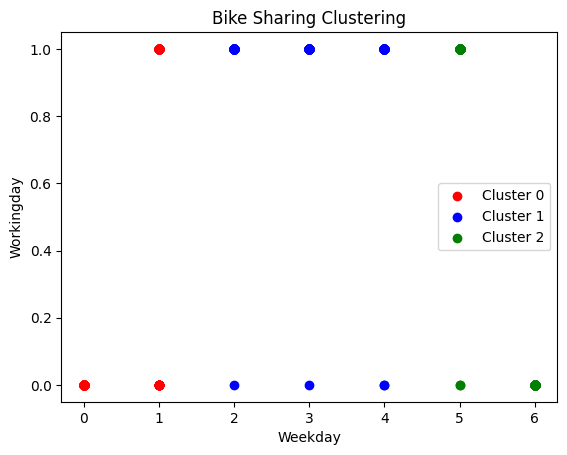

In [37]:
kmeans = KMeans(n_clusters=3)
features = df_cleaned[['weekday', 'workingday', 'holiday']]
kmeans.fit(features)

# Add column 'cluster' to the DataFrame
df_cleaned['cluster'] = kmeans.labels_

# Display clustering results
print("Clustering Results:")
print(df_cleaned)

# Visualization of clustering results
fig, ax = plt.subplots()
for cluster_label, color in zip(range(3), ['red', 'blue', 'green']):
    cluster_points = df_cleaned[df_cleaned['cluster'] == cluster_label]
    ax.scatter(cluster_points['weekday'], cluster_points['workingday'], color=color, label=f'Cluster {cluster_label}')
ax.set_xlabel('Weekday')
ax.set_ylabel('Workingday')
ax.set_title('Bike Sharing Clustering')
ax.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1
    For bike sharing, each month has an average of around 7.8% to 8.8%.
- Conclution pertanyaan 2
    For working days, the bike sharing value is around 1 in each month. 
- Conclution pertanyaan 3
    For total rentals based on season, weekday has the highest value at 528 until 570, followed by workingday at 120 until 131, and holiday below 4 until 7.